<h1 align="center">Essaddek Othmane</h1>


# Partie I: Calcul d'integral par la methode Monte Carlo
On va s’intéresser dans cette partie au calcul de l’intégral suivant:
$$I=\int_{0}^{1} cos(x^{2})e^{-x} \,dx$$
Pour cela, on va utiliser deux méthodes pour approcher l’intégral, que l'on peut aussi interpréter comme l’Espérance d'une variable aléatoire bien choisis.
On peut voir que:
$$I=\int_{0}^{1} cos(x^{2})e^{-x} \,dx=\mathbb{E}[cos(U^{2})e^{-U}]$$
Ou $U\sim U([0,1])$

Une manière équivalente est:
$$I=\int_{0}^{1} cos(x^{2})e^{-x} \,dx=\mathbb{E}[cos(X^{2})\textbf{1}_{[0,1]}(X)]$$
Ou $X\sim exp(1)$

## Estimation selon la loi uniforme
Grace a la loi des grands nombres, on peut approcher $I$ par une moyenne empirique, de suivante:  

Soient $(U_{1},U_{2},....,U_{n})$ n-variables aleatoires independantes et identiquement distribuées selon $U([0,1])$, on a alors présque sûrement, quand $n$ tends vers l'infini:
$$I\longrightarrow Iu_{n}=\frac{1}{n}\sum_{i=1}^{n}f(U_{i})$$
Ou $f(u)=cos(u^{2})e^{-u}$ 

| Estimation |  Erreur | Intervalle de confiance | Variance | cout |
|------------|---------|-------------------------|----------|------|
|   0.5893   |  0.0007 |      [0.588,0.592]      |   0.05   | 0.67 |


### Peut-on diminuer la variance de notre modèle?
Oui, effectivement on peut voir, on utilisant le développement limité de la fonction $f$, on obtient que:  
$$f(x)=1-x+\frac{x^{2}}{2}-\frac{x^{3}}{6}-\frac{11x^4}{24}+o(x^4)$$
On a alors:
$$\mathbb{E}\left[cos(U^{2})e^{-U}\right]=\mathbb{E}\left[cos(U^{2})e^{-U}-\left(1-U+\frac{U^{2}}{2}-\frac{U^{3}}{6}-\frac{11U^4}{24}\right)\right]+\mathbb{E}\left[1-U+\frac{U^{2}}{2}-\frac{U^{3}}{6}-\frac{11U^4}{24}\right]$$  

Par un calcul éxplicite on trouve que $$\mathbb{E}\left[1-U+\frac{U^{2}}{2}-\frac{U^{3}}{6}-\frac{11U^4}{24}\right]=\frac{64}{5}$$  

On va alors approximer par la méthode de Monte Carlo $$\mathbb{E}\left[cos(U^{2})e^{-U}-\left(1-U+\frac{U^{2}}{2}-\frac{U^{3}}{6}-\frac{11U^4}{24}\right)\right]$$  
pour obtenir une variance moins importante que par la mathode monte carlo naive, et lui rajouter $\frac{64}{5}$ pour retrouver $I$, et on retrouve les résultats numériques suivants:  

| Estimation |  Erreur | Intervalle de confiance | Variance | cout |
|------------|---------|-------------------------|----------|------|
|   0.590    | 0.00026 |      [0.589,0.590]      |   0.006  | 0.96 |

**Remarque:** La variance a diminué d'un facteur de dix, mais le cout a augmenté un peu, 

## 2. Estimation selon la loi exponentielle  

   Le principe reste le même que dans la première partie, pour cela on aura besoin de n-variables aléatoires $(X_1,X_2,....,X_n)$ indépendantes indentiquement distribuées selon la loi $exp(1)$ pour approcher $I$ par la moyenne empirique suivante:
   $$Ie_{n}=\frac{1}{n}\sum_{i=1}^{n}g(U_{i})$$.  

Ou $g(x)=cos(x^{2})\textbf{1}_{[0,1]}(x)$

On va alors simuler ces variables aléatoires en simulant des lois uniformes, et c'est possible en utilisant *la methode de l'inversion de la fonction de repartition* pour générer notre échantillon de loi exponentielle.  
  
  
**Proposistion:** Si $U\sim\mathcal{U}([0,1])$, alors $ln(\frac{1}{U})\sim exp(1)$.  

En appliquant tout ce qui precéde, on retrouve les resultats suivants:  

| Estimation |  Erreur | Intervalle de confiance | Variance |  cout |
|------------|---------|-------------------------|----------|-------|
|   0.591    | 0.00144 |      [0.589,0.593]      |  0.2096  | 1.435 |

**Rermarque:** On peut voir que ce n'est pas la mèthode la plus interessante.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import time
%matplotlib inline
%matplotlib inline
from math import *
from numpy.random import *
from numpy.linalg import *
from scipy.misc import *

n2 = 10**5

def f(x):
    return np.cos(x**2)*np.exp(-x)

def g(x):
    return np.cos(x**2)*(x<1 and x>0)

def expo(n):
    U=[]
    for i in range(n):
        u=np.random.uniform(0,1)
        U.append(-np.log(u))
    return(U)

debut1 = time.process_time()

U = np.random.uniform(0,1,n2)
Y = np.zeros(n2)

for i in range (n2):
    Y[i] = f(U[i]);
  

estim1 = np.mean(Y)
sigma1 = np.std(Y)

fin1 = time.process_time()

##################################################
debut2 = time.process_time()

N = expo(n2)
Z = np.zeros(n2)

for i in range (n2):
    Z[i] = g(N[i])

estim2 = np.mean(Z)
sigma2 = np.std(Z)

fin2 = time.process_time()

debut3 = time.process_time()

U3 = np.random.uniform(0,1,n2)
Y3 = np.zeros(n2)

for i in range (n2):
    Y3[i] = f(U3[i])-(1-U3[i]+0.5*U3[i]**2-(1/6)*U3[i]**3-(11/24)*U3[i]**4)
  
estim3 = np.mean(Y3)+(15-11/5)/24
sigma3 = np.std(Y3)

fin3 = time.process_time()

##################################################


quantile = 1.96

err1 = sigma1/np.sqrt(n2)
cout1 = fin1 - debut1
print(estim1 - quantile*err1, estim1 + quantile*err1)
print(cout1)
print(err1)
print(sigma1**2)
print(estim1)

print('#########')

err2 = sigma2/np.sqrt(n2)
cout2 = fin2 - debut2
print(estim2 - quantile*err2, estim2 + quantile*err2)
print(cout2)
print(err2)
print(sigma2**2)
print(estim2)

print('#########')

err3 = sigma3/np.sqrt(n2)
cout3 = fin3 - debut3
print(estim3 - quantile*err3, estim3 + quantile*err3)
print(cout3)
print(err3)
print(sigma3**2)
print(estim3)


0.5888693121331486 0.5916558909575976
0.6864044000000149
0.0007108619450124832
0.05053247048669308
0.5902626015453731
#########
0.5871760644465016 0.5928555306355645
1.450809300000003
0.0014488434155772746
0.20991472428616237
0.5900157975410331
#########
0.5893029391134615 0.590324839967476
1.0140064999999936
0.00026068899337100825
0.00679587512647896
0.5898138895404688


## Exemple de méthode Monte Carlo pour la finace(*Modèle de Black-scholes*)  

On suppose que $(W_t,t\geq 0)$ est un mouvement brownien. En particulier, pour tout temps $T$,
$W_T$ est une gaussienne centrée de variance $T$.

On considère le modèle de Black et Scholes :
$$
  S_t = S_0 \exp\left(\left(r-\frac{\sigma^2}{2}\right)t + \sigma W_t\right).
$$
On supposera dans la suite que $S_0=100$, 
$\sigma=0.3$ (volatilité annuelle) et $r=0.05$ (taux d'intérêt
exponentiel annuel).  

**Problematique:**  
On se place dans le cas des options européenne, et on cherche à calculer le prix d'un call de strike K$=100$ .  
En d'autres thermes, calculer: $$C=\mathbb{E}\left[e^{-rT}(S_T-K)_+\right]$$ 
On presente aussi le prix d'un put européen qu'on va utiliser dans ce qui suit, dont le prix et definie sous la probabilité risque neutre par: $$P=\mathbb{E}\left[e^{-rT}(k-S_T)_+\right]$$  

### Estimation du prix du call par une méthode M.C 
On va calculer le prix par une méthode de monte-carlo avec un nombre de tirages égaux à  $𝑁=1000$ , $10000$ , $100000$ . On précisera aussi l'intervalle de confiance.

In [65]:
T=1; # an
S_0=100; 
r=0.05; # par an
sigma=0.3; # par racine d'annee sigma^2 * T  est sans dimension
K=100;

def stdev(payoff):
    return np.sqrt(np.var(payoff));

def call(x,K):
    return np.maximum(x-K*np.ones(np.size(x)),np.zeros(np.size(x)));

def test_call(N):
    W_T=np.sqrt(T)*np.random.normal(size=N);
    S_T=S_0*np.exp((r-sigma**2/2)*T + sigma*W_T);
    payoff=np.exp(-r*T) * call(S_T,K)

    estimation=np.mean(payoff);  # estimation de la moyenne
    ecart_type=stdev(payoff); # estimation de l'ecart type
    erreur=1.96*ecart_type/np.sqrt(N); # demi-largeur de l'intervalle de confiance
    print('Direct N =',N,':', estimation,'+-', erreur,'Variance: ',np.var(payoff));

test_call(100);
test_call(1000);
test_call(10000);
test_call(100000);


Direct N = 100 : 13.62632786077517 +- 3.4374807939181613 Variance:  307.58731280081827
Direct N = 1000 : 14.936600956979348 +- 1.3874233852692017 Variance:  501.07862609117336
Direct N = 10000 : 14.25746297780172 +- 0.4377828222758465 Variance:  498.89056507654476
Direct N = 100000 : 14.313801918891878 +- 0.13974098015824468 Variance:  508.3179283524296


### Reduction de la variance du modèle

  On va chercher à utiliser la variable aléatoire $S_T$ comme une
  variable de contrôle.  
  
   **proposition:** $\mathbb{E}[S_T]=S_0 e^{rT}$
   
   *Demonstration:*  
  on a 
  $$\mathbb{E}[S_T]=\mathbb{E}\left[S_0 \exp\left(\left(r-\frac{\sigma^2}{2}\right)T + \sigma W_T\right)\right]$$
  Donc
  $$\mathbb{E}[S_T]= S_0 e^{-rT}e^{-\frac{\sigma^{2}}{2}T}\mathbb{E}\left[ e^{\sigma W_T}\right]$$
  
  D'autre part, on a 
  $$e^{-\frac{\sigma^{2}}{2}T}\mathbb{E}\left[ e^{\sigma W_T}\right]=\int_{\mathbb{R}}e^{-\frac{\sigma^{2}}{2}T}e^{\sigma w}\frac{e^{-\frac{w^2}{2T}}}{\sqrt{2\pi T}}\,dw=1$$
  Finalement on trouve que $\mathbb{E}(S_T)=S_0 e^{rT}$
  
  **Remarques:**  
  
  **1.** On a la relation call-put suivante:
  $$C-P=\mathbb{E}\left[e^{-rT}(S_T-K)\right]=S_0-Ke^{-rT}$$
  Donc $$C=P+S_0-Ke^{-rT}$$
  
   On va alors écrire un programme qui utilise $S_T$ comme variable de contrôle, on se ramène alors à calculer $P=\mathbb{E}\left[e^{-rT}(k-S_T)_+\right]$ par la méthode Monte Carlo, et comparer la précision de cette méthode avec la précédente suivant les valeur relative de $K$ et $S_0$, ainsi que vérrifier qu'on a bien diminuer la variance de notre modèle.


In [66]:
T=1; # an
S_0=100; 
r=0.05;
sigma=0.3; 
K=100;

def put(x,K):
    return np.maximum(K*np.ones(np.size(x))-x,np.zeros(np.size(x)));

def test_call_arbitrage(N):
# C-P = S_0 - K exp(-rT)
# On peut donc construire un nouvel estimateur
# S_0 - K exp(-rT) + exp(-rT) * (K-S_T)_+

    W_T=np.sqrt(T)*np.random.normal(size=N);
    S_T=S_0*np.exp((r-sigma**2/2)*T + sigma*W_T);
    payoff=np.exp(-r*T) * put(S_T,K)+S_0-K*np.exp(-r*T)
    
    estimation=np.mean(payoff);  # estimation de la moyenne
    ecart_type=stdev(payoff); # estimation de l'ecart type
    erreur=1.96*ecart_type/np.sqrt(N); # demi-largeur de l'intervalle de confiance
    

    print("CallPut N=",N,": ", estimation, "+-", erreur,'Variance: ',np.var(payoff));

K=200;test_call(10000);test_call_arbitrage(10000);
K=150;test_call(10000);test_call_arbitrage(10000);
K=100;test_call(10000);test_call_arbitrage(10000);
K= 80;test_call(10000);test_call_arbitrage(10000);
K= 60;test_call(10000);test_call_arbitrage(10000);

Direct N = 10000 : 0.18819659537462075 +- 0.04927814723893156 Variance:  6.321157318049301
CallPut N= 10000 :  0.07464818408414986 +- 0.5833004181137934 Variance:  885.6710166902494
Direct N = 10000 : 2.140405728610589 +- 0.1926223230056372 Variance:  96.5830886091421
CallPut N= 10000 :  1.7699532872870571 +- 0.5069878407685545 Variance:  669.0875434380499
Direct N = 10000 : 13.906571734238751 +- 0.43233428794083556 Variance:  486.5497098326462
CallPut N= 10000 :  14.33331445553126 +- 0.2554210623096318 Variance:  169.8248622224615
Direct N = 10000 : 26.163300200614827 +- 0.5348637310686614 Variance:  744.6876583004198
CallPut N= 10000 :  26.46364133955948 +- 0.12419782415843908 Variance:  40.152799681618475
Direct N = 10000 : 43.07543280438092 +- 0.5810803635164048 Variance:  878.9420784682349
CallPut N= 10000 :  43.20117746034692 +- 0.03346648133549066 Variance:  2.915465881348253


**Récapitulatif:**  
Aprés la réalisation des tests on obtient les resultats numerique suivants:

|  méthode |Strike K |resultats| Intervalle  confiance |   K/S_0  | Variance |
|----------|---------|---------|-----------------------|----------|----------|
| Directe  |   200   |  0.20   |      +- 0.0625        |      2   |   10.194 |  
| Call-put |   200   |  0.056  |      +- 0.5872        |      2   |  897.805 |
|          |         |         |                       |          |          |
| Directe  |   150   |  2.1576 |      +- 0.1789        |    1.5   |   83.350 |
| Call-put |   150   |  2.333  |      +- 0.5109        |    1.5   |   679.52 |
|          |         |         |                       |          |          |
| Directe  |   100   |  14.330 |      +- 0.4353        |      1   |  493.331 |
| Call-put |   100   |  14.296 |      +- 0.2534        |      1   |  167.237 |
|          |         |         |                       |          |          |
| Directe  |    80   |  26.296 |      +- 0.5416        |    0.8   |  763.634 |
| Call-put |    80   |  26.394 |      +- 0.1232        |    0.8   |  167.237 |
|          |         |         |                       |          |          |
| Directe  |    60   |  43.063 |      +- 0.5843        |    0.6   |  888.833 |
| Call-put |    60   |  43.203 |      +- 0.0331        |    0.6   |   2.8587 |

**Remarque:** On remarque qu'on a réussi a baisser la variance de notre éstimateur avec notre variable de contrôle sous la condition :$\frac{K}{S_0}\leq 1$

# Partie II: Cas particulier du théorème de Perron-Frobenius.  
   Dans cette partie on va s'intérésser au matrices stochastiques strictement positives et a leur meusure invariante. 

## Mèthode de la puissance 

   On aura besoin du lemme suivant pour retrouver **le vecteur de Perron**.  
   
**Lemme:**  
Soit $A\in \mathcal{M}_n(\mathbb{R})$ une matrice stochastique strictement positive, et soit $p\in\mathbb{R}^n$ l'unique vecteur propre associé à la valeur propre $1$ de $A^t$ et tel que $\mid\mid p\mid\mid_1=1$. Alors, 

$$\lim_{k\to\infty}A^k=\textbf{1}.p^t$$
Ou $\textbf{1}$ est le veteur dont toutes les composantes sont égales a $1$.  
  
*On va alors utiliser ce lemme pour implementer notre algorithme et garder le résultat pour des comparaisons dans ce qui suit :)*



In [78]:
n = 5

A = np.random.rand(n,n)


Normal = [sum([A[i][j] for j in range(n)]) for i in range(n)]
A = np.mat([[A[i][j]/Normal[i] for j in range(n)] for i in range(n)])



P = A.copy()
for i in range(1000):
    P = P*A;

print(P)

Q = A.transpose()

b = np.array([1./n for _ in range(n)]).reshape((n,1))
for i in range(1000):
    b = Q*b


perron=b
print(perron)

[[0.33116897 0.15328443 0.17633998 0.07462548 0.26458114]
 [0.33116897 0.15328443 0.17633998 0.07462548 0.26458114]
 [0.33116897 0.15328443 0.17633998 0.07462548 0.26458114]
 [0.33116897 0.15328443 0.17633998 0.07462548 0.26458114]
 [0.33116897 0.15328443 0.17633998 0.07462548 0.26458114]]
[[0.33116897]
 [0.15328443]
 [0.17633998]
 [0.07462548]
 [0.26458114]]


## Markov chain Monte Carlo:

Le fait que $\mid\mid p\mid\mid_1=1$ nous pérmet de voir le vécteur de Perron comme mesure de probabilité discrète.  
En effet, c'est la mesure invariante de la matrice stochastique $A$. 
  
**Remarque:** La probabilité stationnaire $\pi =(\pi _{i})_{i\in E}$ d'une chaîne de Markov ${\displaystyle X=(X_{n})_{n\geq 0}}$ s'interprète usuellement comme la fraction du temps passé en chaque état ${\displaystyle i}$ de l'espace d'états ${\displaystyle E}$ de cette chaîne de Markov, asymptotiquement. En effet, une version de la loi forte des grands nombres pour les chaînes de Markov stipule que :
$$\pi_i=\lim_{n\to\infty}\frac{1}{n}\sum_{k=1}^{n}\textbf{1}_{\{X_k=i\}}$$  
  
**Idée de l'algorithme:**  
notre objectif est d'estimer par simulation mesure invariante de la matrice stochastique précédente, on va alors procéder de la manière suivante:  

   ***Etape 1 :*** On simule $N=1000$ fois les $T=50$ premiers états de la chaine.  
    $\;\;\;\;\;\;$   pour cela on simule $X_0$ selon n'mporte quelle loi, et le théorème érgodique nous permet d'etre sûr que la chaine q'uon $\;\;\;\;\;\;$ va construire aura le vecteur de Perron comme mesure invariante. 
  On va la construire comme suit:  
  $\;\;\;\;\;\;$ $\forall i\in \{1,...,T\}\text{,}$ on simule $X_{i+1}$ selon la loi de la $X_i$-éme ligne de notre matrice $A$ 
    
  ***Etape 2 :*** On trace l'histograme de la fréquence des visites de chaques états, en d'autres mots:   
  $\;\;\;\;\;\;$ la proportion de temps passer dans chaque états ( ie: L'histograme des $N$ $\frac{1}{T}\sum^T 1_{(X_k = i)}$ ).  
  ***Etape 3 :*** On compare sur la figure, la mesure invariante, qui n'est rien que les hauteurs des piques de l'histograme,avec le vecteur de Perron sur un beau graphique.  
  
  ***Etape 4:*** On visualise la convergence de la moyenne des temps passés dans chaque état, pour cela on fait la proportion de visite sur chaque instant $t\leq T$ des $N$ simulations.  
  
  **Remarque:**  
  On pourrait améliorer le code en retenant la dernière position de la chaîne et renvoyer a chaque $n\leq N$ la chaîne avec probabilité initiale la celle de l’état qu'on a retenue.  

In [79]:
def mc_trajectoire(mu,M,T):
    #Initialisation
    n=M.shape[0]
    if(mu.shape[0]==n):
        traj=np.zeros(T,dtype=int)
        choices=np.arange(n,dtype=int)
        traj[0]=np.random.choice(n, 1,p=mu)
        
        for i in range(T-1):
            mui=np.array(M[traj[i],:])
            traj[i+1] = np.random.choice(choices,1,p=mui[0])
    
    return traj

In [81]:
R = 10000
T = 50

state_space = np.arange(A.shape[0])

names = ('1', '2', '3', '4','5')
mu = np.random.random(A.shape[0])
mu /= mu.sum()
trajs = np.array([mc_trajectoire(mu,A,T) for i in range(R)])
print(trajs)

[[0 4 4 ... 4 2 1]
 [2 0 3 ... 1 2 3]
 [1 3 1 ... 0 4 4]
 ...
 [2 3 3 ... 1 4 0]
 [1 3 3 ... 0 0 4]
 [1 2 1 ... 0 4 2]]


In [83]:
def trace_proportion_temps_passe(espace_detat, trajs, mesure_inv=None, noms_etats=None, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,5))
    ticks = espace_detat
    if noms_etats is None:
        noms_etats = espace_detat
    plt.hist(trajs.flat, density=True, bins=[0,1,2,3,4,5], color='g', edgecolor='red', label = r'$\frac{1}{T}\sum^T 1_{(X_k = i)}$')
    if mesure_inv is not None:
        ax.hlines(mesure_inv, -1,len(state_space),colors='C0',label='vecteur de Perron')
    ax.set(xlabel='État',title=r'$\frac{1}{T}\sum^T 1_{(X_k = i)}$',
           xticks=state_space,xticklabels=noms_etats)
    plt.legend()


[0.325686 0.158576 0.176768 0.0783   0.26067 ]


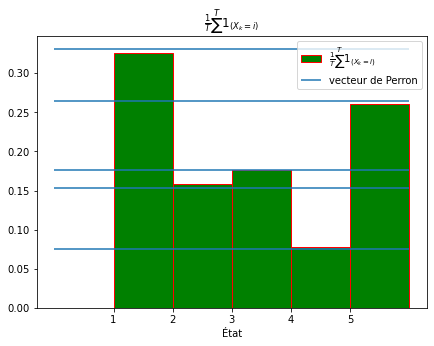

In [84]:
proportions = np.array([ np.sum(trajs==i) for i in state_space])/trajs.size 
print(proportions)
trace_proportion_temps_passe(state_space,
 trajs,
mesure_inv=perron,
 noms_etats=names)


In [75]:
def trace_convergence_temps_passe(trajs, noms, mesure_inv, mu,ax=None):
    proportions = np.array([np.array([(trajs[0,:t]==i).sum()/(trajs[0,:t]).size for i in state_space])
                            for t in range(1,trajs.shape[1])])

    if ax is None:
        fig, ax = plt.subplots(figsize=(16,4))
    for i,name in enumerate(names):
        plt.plot(proportions[:,i],label=name)
    ax.hlines(mesure_inv,0,trajs.shape[1],linestyle=':',color=('C0','C1','C2','C3','C4'),label='Perron')
    ax.hlines(mu,0,trajs.shape[1],linestyle='-.',linewidth=1,color=('C0','C1','C2','C3','C4'),label='Mesure initiale')
    ax.set(xlabel='Temps',ylabel='Proportion du temps passé',ylim=(0,1),xlim=(0,trajs.shape[1]),title=r'Convergence de $\frac{1}{T}\sum^T 1_{(X_k = i)}$')
    ax.legend()

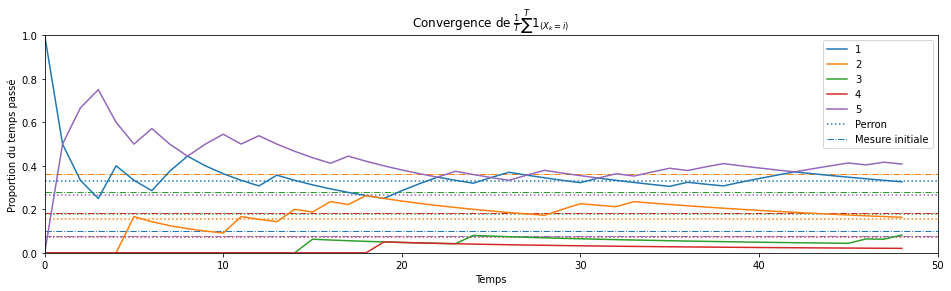

In [85]:
trace_convergence_temps_passe(trajs,names, perron, mu)